In [2]:
#class is also from given code
class Graph:
    def __init__(self, graph):
        self.graph = graph
        self.row = len(graph)
        
    # this code is from the given fulkerson code, kept this the same
    def BFS(self, s, t, parent):

            # Mark all the vertices as not visited
            visited = [False] * (self.row)

            # Create a queue for BFS
            queue = []

            # Mark the source node as visited and enqueue it
            queue.append(s)
            visited[s] = True

            # Standard BFS Loop
            while queue:
                # Dequeue a vertex from queue and print it
                u = queue.pop(0)

                # Get all adjacent vertices of the dequeued vertex u. If a adjacent has not 
                # been visited, then mark it visited and enqueue it
                for ind, val in enumerate(self.graph[u]):
                    if visited[ind] == False and val > 0:
                        # If we find a connection to the sink node,
                        # then there is no point in BFS anymore
                        # We just have to set its parent and can return true
                        queue.append(ind)
                        visited[ind] = True
                        parent[ind] = u
                        if ind == t:
                            return True

            # We didn't reach sink in BFS starting from source; return false
            return False
        

    #code for edmond_karp, the code was already given, nothing changed in here
    def edmond_karp(self, source, sink):
        
        self.graph = graph # residual graph
        self.row = len(graph)
        # This array is filled by BFS and to store path
        parent = [-1] * (self.row)

        max_flow = 0 # There is no flow initially

        # Augment the flow while there is path from source to sink
        while self.BFS(source, sink, parent) :

            # Find minimum residual capacity of the edges along the path filled by BFS. 
            # Or we can say find the maximum flow through the path found.
            path_flow = float("Inf")
            s = sink
            while(s != source):
                path_flow = min (path_flow, self.graph[parent[s]][s])
                s = parent[s]

            # Add path flow to overall flow
            max_flow += path_flow

            # update residual capacities of the edges and reverse edges along the path
            v = sink
            while(v != source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]

        return max_flow

    
    #def linear_programming():
        
    

1. Generate n + 2 node flow network as follows, where node 0 and node n + 1 are the start node and the target node, and the rest of the nodes are labeld as 1, 2, ..., n. For each node i, i = 0, ..., n, use a pseduo-random number generator for the range between between 0 and sqrt(n)//1 to generate a sequence c1c2 ... cn, where cj is the capacity from node i to node j. Do the same for node n + 1, but this time cj is the capacity from node j to node n + 1. (You may reuse your code for this part in CA 7.)

In [13]:
import random
import math

def flow_network(n):
    
    network = [[0 for i in range(n+2)] for j in range(n+2)]       #creating the flow as a matrix
    

    for i in range(0, n+1):                                         #generate capacity/nodes between 0 and n, ottherwise it 
        for j in range(0, n+1):                                     #will print all 0 except for start and end node
            if i != j:
                cj = random.randint(0, math.isqrt(n) // 1)
                network[i][j] = cj
    
    
    for j in range(0, n+1):                                           #generate capacity for 0
        cj = random.randint(0, math.isqrt(n) // 1)                   #generate a random number between 0 and squareroot of n
        network[0][j] = cj
    
                
    for i in range(0, n+1):                                           #generate capacity for n + 1
        cj = random.randint(0, math.isqrt(n) // 1)                  #generate a random number between 0 and squareroot of n
        network[i][n+1] = cj

    

    return network


def linear_programming(network):                                  #function takes in the network as a parameter
    n = len(network)                                              #length of the network
    
    cCoe = [0] * (n**2)                                           #initialize the coefficient to 0
    aMat = [[0] * (n**2) for i in range(n*2)]                     #initialize the matrix to a matrix of 0
    bVec = [0] * (n*2)                                            #initialize the vector to 0
    
    for i in range(n):                                            #for loop to go through each node
        for j in range(n):
            cCoe[i*n+j] = network[i][j]                           #sets the coe and matrix to the network
            aMat[i][i*n+j] = network[i][j]                        
            
    linpro = linprog(cCoe, A_ub=aMat, b_ub=bVec, method = "highs")                    #linprog function in set to res
    return linpro.fun




In [14]:
network = flow_network(5)                            #example output of flow network
print(network)

[[2, 1, 1, 1, 2, 2, 1], [2, 0, 2, 0, 0, 1, 1], [0, 1, 0, 0, 0, 0, 1], [0, 2, 1, 0, 1, 0, 2], [2, 1, 0, 2, 0, 2, 1], [1, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0]]


2. Use LP to find the maximum flow from node 0 to node n + 1. 

In [15]:
from scipy.optimize import linprog               #imports linprog function
import time

n_LP = []
t_LP = []

for i in range (10):                               #to do this 10 times, take a long time to complete
    for n in range(10, 20):                           #n values between 100 and 200
    
        n_LP.append(n)                                  #appending the n values into the array
    
    
        graph = flow_network(n)
        G = Graph(graph)                                #tried calling the flow network like this without 'graph' but would show 0 values
            
    
        start_time_LP = time.time()                     #runs linear programmin and times it
        
        lp = linear_programming(graph)                  #linear_programming is assigned to lp
        
        end_time_LP = time.time()                        #time ends
        run_time_LP = end_time_LP - start_time_LP       #calculates time
        t_LP.append(run_time_LP) 

3. Use Edmonds-Karp to find the maximum flow from node 0 to node n + 1. (You may reuse your code for this part in CA 7.)
4. Repeat items 1 to 3 above for 10 times for each value of n from 10 to 19 with an increment of 1, and record the running time. Produce a line graph on average running time for each value of n. What conclusions can you draw? 

In [16]:
import time
import matplotlib.pyplot as plt

n_EK = []
t_EK = []                                          #arrays to hold the n values, and time

for i in range (10):                               #to do this 10 times, take a long time to complete
    for n in range(10, 20):                           #n values between 100 and 200
    
        n_EK.append(n)                                  #appending the n values into the array
    
    
        graph = flow_network(n)
        G = Graph(graph)                                #tried calling the flow network like this without 'graph' but would show 0 values
            
    
        start_time_EK = time.time()                     #runs edmond karp and times it
        
        ek = G.edmond_karp(0, n + 1)                   #runs G on edmond_karp
        
        end_time_EK = time.time()                        #time ends
        run_time_EK = end_time_EK - start_time_EK        #calculates time
        t_EK.append(run_time_EK)                         #adds the time in to the array
    

In [17]:
for row in graph:
    print(row)                                          #prints the graph 
    
print("Edmond-Karp: ", ek)                                     #prints the maximum flow and runtime
print("Run time Edmond-Karp: ", run_time_EK, "seconds")
print("Linear_Programming: ", lp)                                     #prints the maximum flow and runtime
print("Run time Linear Programming: ", run_time_LP, "seconds")

# print("Run time Linear Programming: ", t_LP, "seconds")

[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[4, 0, 1, 3, 3, 0, 1, 3, 1, 4, 3, 3, 2, 0, 3, 2, 1, 2, 1, 4, 0]
[6, 0, 0, 0, 2, 0, 0, 0, 1, 1, 4, 1, 3, 3, 2, 2, 4, 1, 3, 2, 0]
[2, 1, 5, 0, 4, 3, 3, 1, 4, 2, 3, 0, 2, 4, 1, 3, 0, 0, 3, 3, 0]
[7, 3, 0, 3, 0, 3, 1, 4, 2, 4, 4, 1, 1, 4, 3, 0, 0, 0, 0, 0, 0]
[7, 3, 2, 4, 1, 0, 2, 2, 4, 1, 0, 3, 3, 4, 4, 2, 1, 1, 2, 1, 0]
[2, 3, 2, 0, 2, 0, 0, 4, 2, 0, 5, 4, 3, 3, 2, 1, 5, 2, 0, 4, 0]
[2, 2, 4, 4, 1, 0, 4, 0, 1, 2, 0, 1, 4, 0, 4, 4, 2, 1, 4, 0, 0]
[5, 3, 4, 3, 2, 3, 2, 2, 0, 0, 3, 1, 0, 2, 1, 0, 1, 3, 4, 0, 0]
[2, 0, 1, 3, 1, 1, 1, 1, 0, 0, 2, 4, 6, 3, 1, 4, 4, 2, 4, 4, 0]
[6, 0, 3, 3, 3, 4, 0, 0, 1, 0, 0, 0, 0, 3, 0, 4, 3, 1, 2, 0, 0]
[4, 2, 4, 3, 1, 0, 2, 3, 1, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 0]
[4, 3, 0, 4, 1, 3, 0, 3, 3, 0, 3, 0, 0, 2, 1, 4, 0, 4, 2, 3, 0]
[5, 1, 3, 4, 4, 3, 4, 1, 1, 1, 2, 1, 3, 0, 3, 3, 2, 4, 0, 0, 0]
[8, 1, 3, 0, 1, 1, 4, 2, 1, 0, 3, 3, 0, 2, 0, 2, 0, 4, 1, 0, 0]
[5, 4, 2, 1, 0, 4, 2, 2, 2, 1, 2, 0, 3, 

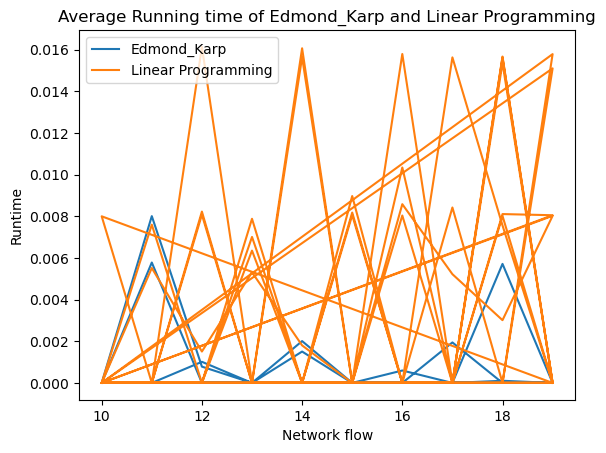

In [18]:
plt.plot(n_EK, t_EK, label = "Edmond_Karp")
plt.plot(n_LP, t_LP, label = "Linear Programming")
plt.title("Average Running time of Edmond_Karp and Linear Programming")
plt.xlabel("Network flow")
plt.ylabel("Runtime")
plt.legend()
plt.show()

Majority of the code is the same from the previous assignment CA7. I added a linear programming function that uses linprog funtion from the scipy library. I initialize the coefficient, matrix, and vector 0 and than in the for loop initialize the coefficient and matrix to the network. 

I than run it with the network flow just like Edmond_karp and do the timing and appending just like the previous assignment. 

The maximum flow is 0 for linear every single time and the runtime is also usually 0. But the graph shows linear programming having runtime and flow values. In the code block where it prints the graph, i commented out a line of code the prints the runtime and it prints all the values. But i am not sure why the network flow value is 0. 

Based on what i have, linear programming is faster than Edmond Karp.The linear graph has many more spikes than EK.